In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

import matplotlib
import plotly
import sklearn

from IPython.display import display
plt.style.use("ggplot")

print("package版本信息：")
print("numpy:      ", np.__version__)
print("pandas:     ", pd.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn:    ", sklearn.__version__)
print("seaborn:    ", sns.__version__)
print("plotly:     ", plotly.__version__)

package版本信息：
numpy:       1.18.1
pandas:      1.0.1
matplotlib:  3.1.3
sklearn:     0.22.1
seaborn:     0.10.0
plotly:      4.14.1


In [2]:
# 设置显示所有的列
pd.options.display.max_columns = None
# 设置显示所有的行
pd.options.display.max_rows = None

# 阻止waring显示
import warnings
warnings.filterwarnings('ignore')

# 探索性数据分析EDA

## 数据读取

In [3]:
pwd

'D:\\Project-Workspace\\Python-Projects\\DataAnalysis\\Tianchi\\Loans-Default-Predict'

In [4]:
data = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/testA.csv")
print(data.shape)
print(test.shape)

(800000, 47)
(200000, 46)


In [5]:
data.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

## 检查类别标签是否平衡

In [7]:
y.value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

## 特征概览

一共46个特征字段，具体分类如下

+ ID字段：id
+ 数值型——31个
  + 实数型——10个  
    loanAmnt，interestRate，installment，annualIncome，dti，ficoRangeLow，ficoRangeHigh，revolBal，revolUtil，totalAcc
  + 计数型——4+15=19个  
    delinquency_2years，openAcc，pubRec，pubRecBankruptcies，n0至n14
  + 日期型——2个  
    issueDate，earliesCreditLine
+ 类别型——10个
  + 有序型——5个  
    term，grade，subGrade，employmentLength，homeOwnership
  + 标称型——5个  
    verificationStatus，purpose，initialListStatus，applicationType，policyCode   
+ 待定——4个  
  employmentTitle，postCode，regionCode，title
  
  
对于分类问题，首先检查各个特征和类标签之间的关系.  
类标签是离散变量，根据特征的属性，具体处理分为
  1. 对于连续特征，检查不同类别下的分布是否有显著不同，可以使用类别分组的箱线图
  2. 对于类别特征，检查不同类别下的取值分布是否有差异，可以使用按照类标签分组的分组条形图

+ data里有一列 `isDefault` 是目标变量

In [6]:
features = ['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade', 'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome', 
            'verificationStatus', 'issueDate',
#             'isDefault', 
            'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 
            'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'earliesCreditLine', 'title', 
            'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']

# 训练记录集里ID没有用，所以在这里就去掉
X = data[features].drop('id',axis=1)
y = data['isDefault']
X.shape

(800000, 45)

## 数值型特征分布

+ 10个连续特征（**不包括计数型和日期型**）在不同类标签下的分布

In [14]:
# plotly 在大数据集下的性能实在是太差了

# from plotly.subplots import make_subplots

# box_loan = px.box(data_frame=data,  x='loanAmnt', y='isDefault', orientation='h')
# box_interest = px.box(data_frame=data,  x='interestRate', y='isDefault', orientation='h')
# box_intallment = px.box(data_frame=data,  x='installment', y='isDefault', orientation='h')
# box_income = px.box(data_frame=data,  x='annualIncome', y='isDefault', orientation='h')

# fig = make_subplots(rows=2, cols=2)

# fig.add_trace(
#     box_loan.data[0], row=1, col=1
# )
# fig.add_trace(
#     box_interest.data[0], row=1, col=2
# )
# fig.add_trace(
#     box_intallment.data[0], row=2, col=1
# )
# fig.add_trace(
#     box_income.data[0], row=2, col=2
# )

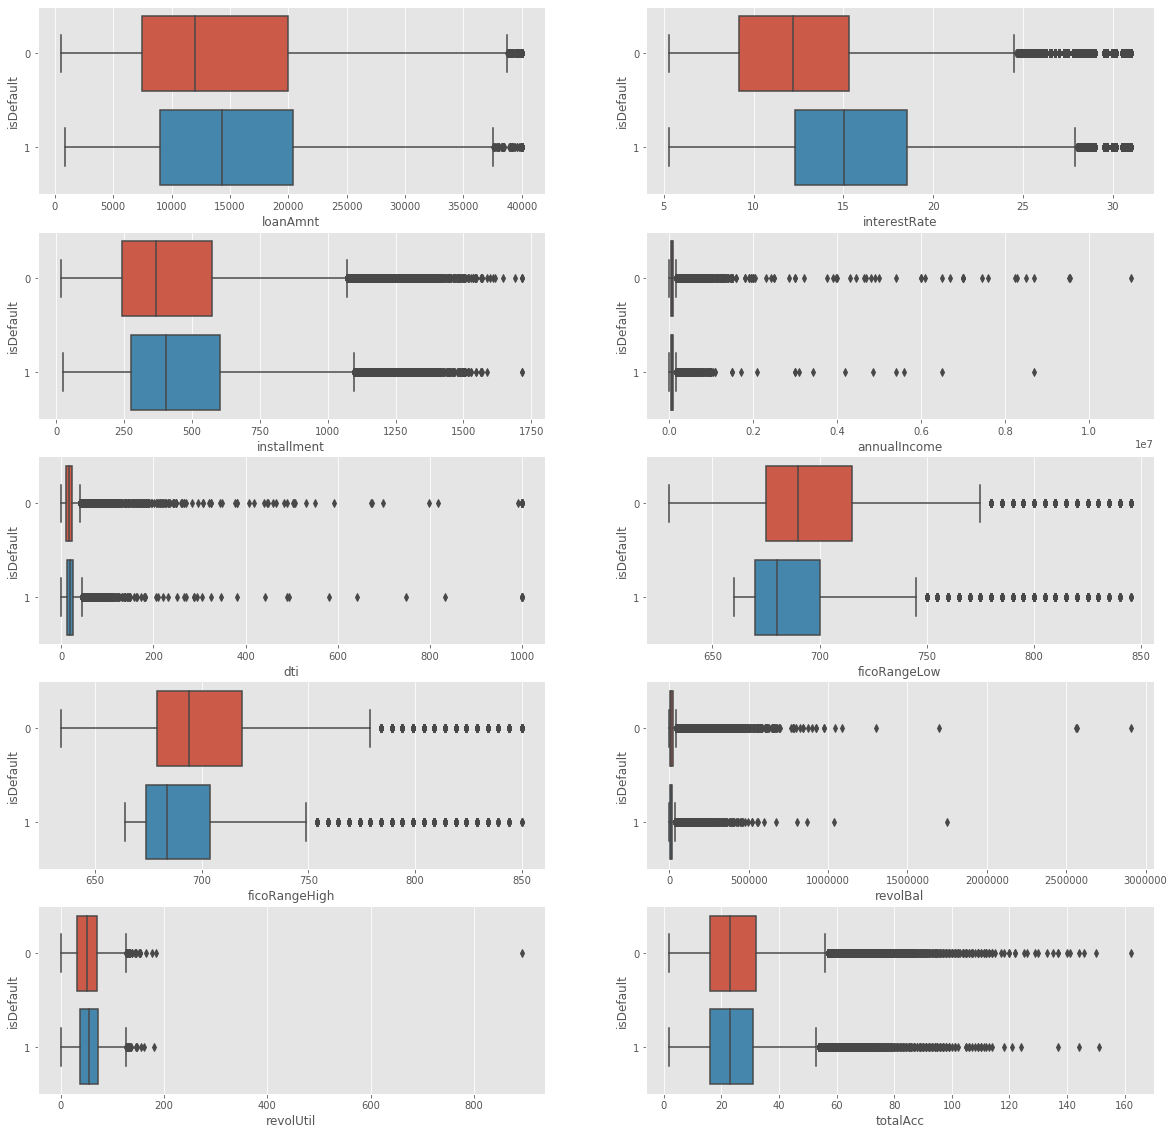

In [28]:
fig, axes = plt.subplots(5,2, figsize=(20,20))
sns.boxplot(data=data, x='loanAmnt', y='isDefault', orient='h', ax=axes[0,0])
sns.boxplot(data=data, x='interestRate', y='isDefault', orient='h', ax=axes[0,1])
sns.boxplot(data=data, x='installment', y='isDefault', orient='h', ax=axes[1,0])
sns.boxplot(data=data, x='annualIncome', y='isDefault', orient='h', ax=axes[1,1])
sns.boxplot(data=data, x='dti', y='isDefault', orient='h', ax=axes[2,0])
sns.boxplot(data=data, x='ficoRangeLow', y='isDefault', orient='h', ax=axes[2,1])
sns.boxplot(data=data, x='ficoRangeHigh', y='isDefault', orient='h', ax=axes[3,0])
sns.boxplot(data=data, x='revolBal', y='isDefault', orient='h', ax=axes[3,1])
sns.boxplot(data=data, x='revolUtil', y='isDefault', orient='h', ax=axes[4,0])
sns.boxplot(data=data, x='totalAcc', y='isDefault', orient='h', ax=axes[4,1])

## 离散型特征分布

+ 10个类别型特征（包括有序型和标称型）按照类标签分组之后在不同取值下的分布
  + 有序型——5个  
    term，grade，subGrade，employmentLength，homeOwnership
  + 标称型——5个  
    verificationStatus，purpose，initialListStatus，applicationType，policyCode

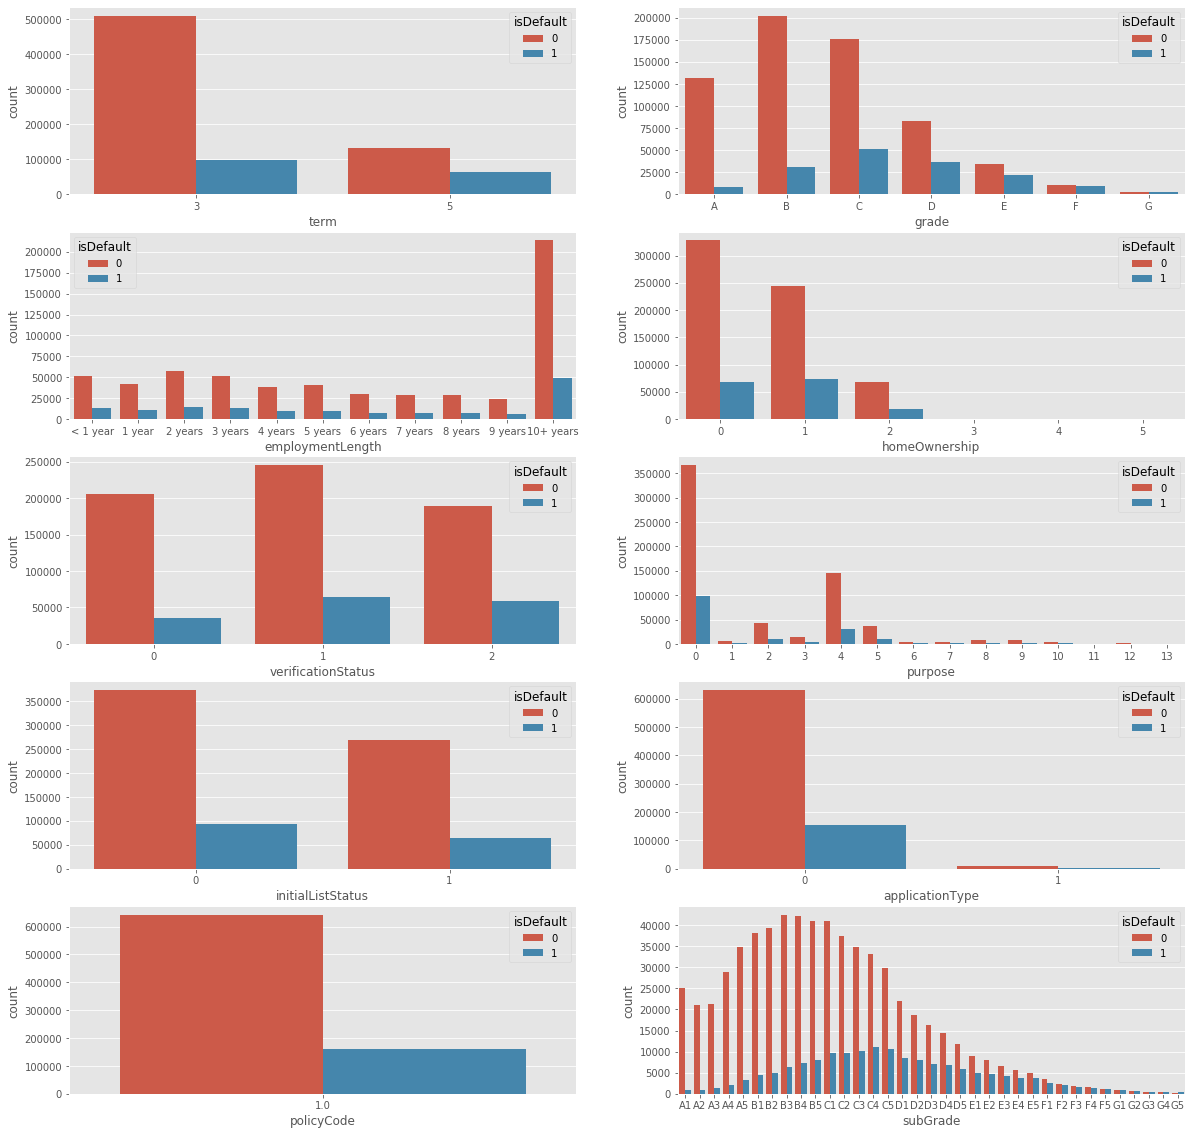

In [56]:
fig, axes = plt.subplots(5,2, figsize=(20,20))

sns.countplot(data=data, x='term', hue='isDefault', ax=axes[0,0])
sns.countplot(data=data, x='grade', hue='isDefault', ax=axes[0,1], order=['A','B','C','D','E','F','G'])
years_list = ['< 1 year', '1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
sns.countplot(data=data, x='employmentLength', hue='isDefault', ax=axes[1,0], order=years_list)
sns.countplot(data=data, x='homeOwnership', hue='isDefault', ax=axes[1,1])
sns.countplot(data=data, x='verificationStatus', hue='isDefault', ax=axes[2,0])
sns.countplot(data=data, x='purpose', hue='isDefault', ax=axes[2,1])
sns.countplot(data=data, x='initialListStatus', hue='isDefault', ax=axes[3,0])
sns.countplot(data=data, x='applicationType', hue='isDefault', ax=axes[3,1])
sns.countplot(data=data, x='policyCode', hue='isDefault', ax=axes[4,0])
subGrade_list = [i+j for i in ['A','B','C','D','E','F','G'] for j in ['1','2','3','4','5']]
sns.countplot(data=data, x='subGrade', hue='isDefault', ax=axes[4,1], order=subGrade_list)

## 其他特征



## 总结

----------

# 数据预处理

## 缺失值处理

In [206]:
def miss_stat(df):
    """
    用于统计DF中各列的缺失值信息和占比
    """
    miss_num = df.isnull().sum()
    # 只展示有缺失值的特征
    miss_num = miss_num[miss_num > 0]
    total = df.shape[0]
    miss_percent = miss_num/total*100
    miss_info = pd.concat([miss_num, miss_percent, df.dtypes], axis = 1, keys=['miss_num', 'miss_percent','dtype'])
    miss_info['total'] = total
    miss_info = miss_info[['miss_num','total','miss_percent','dtype']]
    miss_info.dropna(inplace=True)
#     降序排列，同时设置小数点的位数
    miss_info = miss_info.sort_values(by=['miss_num'],ascending=False).round(decimals=3)
#     打印
#     from IPython.display import display
    print("miss_stat.shape: ", miss_info.shape)
    print("miss_stat:")
    display(miss_info) 
#     print(miss_info)
    return miss_info

In [207]:
# 缺失值填充函数
def Fill_na(df, numerical_cols=None, discrete_cols=None):
    """
    对数值特征使用均值填充，对离散特征使用众数填充
    """
    df = df.copy()
    if numerical_cols is not None:
        # df.mean()返回的是一个series，可以直接用.to_dict()
        num_mean_dict = df[numerical_cols].mean(axis=0).to_dict()
        # 不知道为什么，下面这一句，是对 copy 进行的操作，而不是对 view 进行的操作
        # df[numerical_cols].fillna(value=num_mean_dict, inplace=True)
        df[numerical_cols] = df[numerical_cols].fillna(value=num_mean_dict)
    
    if discrete_cols is not None:
        # df.mode() 返回的是一个DataFrame，调用to_dict()后还需要进一步处理
        mode_dict = df[discrete_cols].mode(axis=0).to_dict()
        discrete_mode_dict = {}
        for key in mode_dict.keys():
            discrete_mode_dict[key] = mode_dict[key][0]
        # df[discrete_cols].fillna(value=discrete_mode_dict, inplace=True)
        df[discrete_cols] = df[discrete_cols].fillna(value=discrete_mode_dict)
    return df

In [194]:
miss_df = miss_stat(X)

miss_stat.shape:  (22, 4)
miss_stat:


,miss_num,total,miss_percent,dtype
n11,69752.0,800000,8.719,float64
employmentLength,46799.0,800000,5.850,object
n8,40271.0,800000,5.034,float64
n14,40270.0,800000,5.034,float64
n13,40270.0,800000,5.034,float64
n12,40270.0,800000,5.034,float64
n9,40270.0,800000,5.034,float64
n0,40270.0,800000,5.034,float64
n1,40270.0,800000,5.034,float64
n2,40270.0,800000,5.034,float64


+ 简单的缺失值填充策略
  + 实数型特征——使用均值或者中位数
  + 计数型、有序型、标称型特征——使用**众数**

In [187]:
features = list(X.columns)
num_cols = ['loanAmnt', 'interestRate', 'installment', 'annualIncome', 'dti', 'ficoRangeLow', 'ficoRangeHigh', 'revolBal', 'revolUtil', 'totalAcc']
discrete_cols = [col for col in features if col not in num_cols]

In [202]:
X = Fill_na(X, numerical_cols=num_cols, discrete_cols=discrete_cols)
_ = miss_stat(X)

miss_stat.shape:  (0, 4)
miss_stat:


,miss_num,total,miss_percent,dtype


+ 对测试集数据也做这样的处理

In [212]:
_ = miss_stat(test)

miss_stat.shape:  (19, 4)
miss_stat:


,miss_num,total,miss_percent,dtype
n11,17575.0,200000,8.788,float64
employmentLength,11742.0,200000,5.871,object
n6,10111.0,200000,5.056,float64
n13,10111.0,200000,5.056,float64
n12,10111.0,200000,5.056,float64
n9,10111.0,200000,5.056,float64
n8,10111.0,200000,5.056,float64
n7,10111.0,200000,5.056,float64
n5,10111.0,200000,5.056,float64
n3,10111.0,200000,5.056,float64


In [213]:
test = Fill_na(test, numerical_cols=num_cols, discrete_cols=discrete_cols)
_ = miss_stat(test)

miss_stat.shape:  (0, 4)
miss_stat:


,miss_num,total,miss_percent,dtype


## 特征预编码

这一步主要是对那些属性值不是数值的特征进行编码转换，需要进行转换的特征有：
+ 数值型——31个
  + 实数型——10个：无需处理  
    loanAmnt，interestRate，installment，annualIncome，dti，ficoRangeLow，ficoRangeHigh，revolBal，revolUtil，totalAcc
  + 计数型——4+15=19个：后续分箱处理  
    delinquency_2years，openAcc，pubRec，pubRecBankruptcies，n0至n14
  + 日期型——2个：暂时不处理  
    issueDate，earliesCreditLine
+ 类别型——10个
  + 有序型——5个  
    term，homeOwnership：已经是序数型，暂不处理；   
    **grade，subGrade，employmentLength，字符串，需要进行序数编码**
  + 标称型——5个  
    verificationStatus，purpose，initialListStatus，applicationType，policyCode：已经是数值表示，暂不处理   
+ 待定——4个  
  employmentTitle，postCode，regionCode，title
  
**所以需要编码的特征有：grade，subGrade，employmentLength. 要将它们从字符型转换成整数表示的序数型**。

In [228]:
# 有序特征的取值编码
subGrade_list = [i+j for i in ['A','B','C','D','E','F','G'] for j in ['1','2','3','4','5']]
years_list = ['< 1 year', '1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
order_encode = {
    'grade': {'A':1,'B':2,'C':3, 'D':4, 'E':5, 'F':6, 'G':7},
    'subGrade': dict(zip(subGrade_list, np.arange(len(subGrade_list))+1)),
    'employmentLength': dict(zip(years_list, np.arange(len(years_list))+1))
}

def Order_encode_fun(df, order_encode):
    """
    用于根据有序特征的取值编码字典 order_encode 来进行值的替换
    """
    df = df.copy()
    for col in order_encode.keys():
        df[col].replace(to_replace=order_encode[col], inplace=True)
    return df

In [214]:
X.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,0.0,3.0,4.0,4.0,10.0,5.0,4.0,6.0,11.0,4.0,13.0,0.0,0.0,0.0,1.0
2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,3000.0,3,12.99,101.07,C,C2,54.0,10+ years,1,29000.0,2,2016-03-01,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [226]:
X = Order_encode_fun(X, order_encode=order_encode)

In [227]:
X.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,35000.0,5,19.52,917.97,5,22,320.0,3,2,110000.0,2,2014-07-01,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,18000.0,5,18.49,461.90,4,17,219843.0,6,0,46000.0,2,2012-08-01,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,0.0,3.0,4.0,4.0,10.0,5.0,4.0,6.0,11.0,4.0,13.0,0.0,0.0,0.0,1.0
2,12000.0,5,16.99,298.17,4,18,31698.0,9,0,74000.0,2,2015-10-01,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,11000.0,3,7.26,340.96,1,4,46854.0,11,1,118000.0,1,2015-08-01,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,3000.0,3,12.99,101.07,3,12,54.0,11,1,29000.0,2,2016-03-01,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [229]:
test = Order_encode_fun(test, order_encode)

In [230]:
test.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,2,8,7027.0,11,0,80000.0,0,2014-07-01,0,163.0,21,10.56,1.0,715.0,719.0,17.0,0.0,0.0,9846.0,30.7,29.0,0,0,Nov-1974,0.0,1.0,1.0,4.0,6.0,6.0,6.0,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,3,15,60426.0,11,0,50000.0,0,2015-07-01,2,235.0,8,21.40,2.0,670.0,674.0,5.0,0.0,0.0,8946.0,56.6,14.0,0,0,Jul-2001,5.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,4,19,23547.0,3,1,60000.0,2,2016-10-01,0,526.0,20,33.50,0.0,710.0,714.0,12.0,0.0,0.0,970.0,17.6,43.0,1,0,Aug-2006,0.0,1.0,0.0,1.0,4.0,4.0,1.0,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,3,14,636.0,5,0,37000.0,1,2014-11-01,4,248.0,11,13.95,0.0,685.0,689.0,10.0,1.0,1.0,10249.0,52.3,18.0,0,0,Jul-2002,4.0,1.0,0.0,2.0,2.0,2.0,4.0,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,4,16,368446.0,1,1,80000.0,1,2017-10-01,0,115.0,8,24.97,0.0,685.0,689.0,19.0,0.0,0.0,33199.0,35.6,22.0,0,0,Dec-2000,0.0,1.0,0.0,8.0,11.0,11.0,9.0,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


-------------

# 特征工程

## 特征分箱

## 特征过滤

+ 数值型——31个
  + 实数型——10个：无需处理  
    loanAmnt，interestRate，installment，annualIncome，dti，ficoRangeLow，ficoRangeHigh，revolBal，revolUtil，totalAcc
  + 计数型——4+15=19个：后续分箱处理  
    delinquency_2years，openAcc，pubRec，pubRecBankruptcies，n0至n14
  + 日期型——2个：暂时不处理  
    issueDate，earliesCreditLine
+ 类别型——10个
  + 有序型——5个  
    term，homeOwnership：已经是序数型，暂不处理；   
    grade，subGrade，employmentLength，进行过序数编码
  + 标称型——5个  
    verificationStatus，purpose，initialListStatus，applicationType，policyCode：已经是数值表示，暂不处理   
+ 待定——4个  
  employmentTitle，postCode，regionCode，title

这里首先考虑：
1. 丢弃 2 个日期型特征：issueDate，earliesCreditLine
2. 丢弃 4 个待定类别的特征：employmentTitle，postCode，regionCode，title
3. policyCode只有一个取值，所以也丢弃

只剩下 29+9=38 个

In [237]:
# features = ['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade', 'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome', 
#             'verificationStatus', 'issueDate',
# #             'isDefault', 
#             'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 
#             'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'earliesCreditLine', 'title', 
#             'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']

features_final = ['loanAmnt', 'term', 'interestRate', 'installment', 'grade', 'subGrade',             'employmentLength', 'homeOwnership', 'annualIncome', 
            'verificationStatus',        'purpose',                          'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 
            'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 
                      'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']
len(features_final)

38

In [238]:
X_final = X[features_final]
test_final = test[ ['id']+features_final ]

In [319]:
test_final = test[ features_final ]

-----------------------

# 建模

In [263]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

## 训练集、测试集划分

In [241]:
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=29 )
print(X_train.shape)
print(X_test.shape)

(560000, 38)
(240000, 38)


## 决策树分类器

In [261]:
from sklearn.tree import DecisionTreeClassifier

In [250]:
dtc = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [257]:
print("train score: ", dtc.score(X_train, y_train))
print("test score: ", dtc.score(X_test, y_test))

train score:  0.8012285714285714
test score:  0.8022041666666667


In [268]:
dtc.classes_

array([0, 1], dtype=int64)

In [269]:
y_pred = dtc.predict(X_test)
y_pred_prob = dtc.predict_proba(X_test)[:,1]

In [275]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
cm = pd.DataFrame(cm, columns=['1','0'], index=['1','0'])

precision = precision_score(y_true=y_test, y_pred=y_pred, labels=[1,0], pos_label=1)
recall = recall_score(y_true=y_test, y_pred=y_pred, labels=[1,0], pos_label=1)
f1 = f1_score(y_true=y_test, y_pred=y_pred, labels=[1,0], pos_label=1)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob, pos_label=1)
auc = roc_auc_score(y_true=y_test, y_score=y_pred_prob)

In [276]:
cm

,1,0
1,2436,45151
0,2320,190093


In [299]:
print("precision: ", precision)
print("recall: ", recall)
print("f1 score: ", f1)
print("auc score: ", auc)

precision:  0.6191261335531739
recall:  0.015781621030953832
f1 score:  0.030778688524590165
auc score:  0.7104748180728813


In [278]:
2436/(2436+45151)

0.05119045117363986

## 随机森林分类器

In [258]:
from sklearn.ensemble import RandomForestClassifier

In [291]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_leaf=10, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [292]:
print("train score: ", rfc.score(X_train, y_train))
print("test score: ", rfc.score(X_test, y_test))

train score:  0.8017214285714286
test score:  0.802925


In [293]:
rfc.classes_

array([0, 1], dtype=int64)

In [294]:
y_pred = rfc.predict(X_test)
y_pred_prob = rfc.predict_proba(X_test)[:,1]

In [301]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
cm = pd.DataFrame(cm, columns=['1','0'], index=['1','0'])

precision = precision_score(y_true=y_test, y_pred=y_pred, labels=[1,0], pos_label=1)
recall = recall_score(y_true=y_test, y_pred=y_pred, labels=[1,0], pos_label=1)
f1 = f1_score(y_true=y_test, y_pred=y_pred, labels=[1,0], pos_label=1)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob, pos_label=1)
auc = roc_auc_score(y_true=y_test, y_score=y_pred_prob)

In [296]:
cm

,1,0
1,751,46836
0,462,191951


In [302]:
print("precision: ", precision)
print("recall: ", recall)
print("f1 score: ", f1)
print("auc score: ", auc)

precision:  0.6191261335531739
recall:  0.015781621030953832
f1 score:  0.030778688524590165
auc score:  0.7104748180728813


## XGBoost分类器

In [298]:
import xgboost as xgb

In [303]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [304]:
# 这个params字段里配置的是 Booster 类的参数
params = {'booster':'gbtree',  #基分类器
          'objective': 'binary:logistic', #目标函数
         'eta': 0.3,  #学习速率
         'gamma': 0,  #分裂的最小增益
         'max_depth': 6,  #树的最大深度
         'lambda': 1,  #L2正则项系数
         'alpha': 0,  # L1正则项系数
         'subsample': 1,  #boostrap时的采样比例
         'tree_method': 'auto',  # 树的生成方式
         'base_score': 0.5,  # 生成第一棵树时的初始值
         'eval_metric': ['error','auc']  # 在 验证集 上进行评估的指标，可以选择多个
}

# booster的个数
num_round = 50

# 用于训练时查看验证集上效果的 evals (list of pairs (DMatrix, string)) 
watch_list = [(dtrain, 'train'), (dtest, 'eval')]

In [305]:
bst = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_round, evals=watch_list, n_jo)

[0]	train-error:0.19877	train-auc:0.70279	eval-error:0.19780	eval-auc:0.70138
[1]	train-error:0.19869	train-auc:0.70695	eval-error:0.19757	eval-auc:0.70514
[2]	train-error:0.19802	train-auc:0.70922	eval-error:0.19675	eval-auc:0.70736
[3]	train-error:0.19797	train-auc:0.71075	eval-error:0.19682	eval-auc:0.70818
[4]	train-error:0.19770	train-auc:0.71225	eval-error:0.19671	eval-auc:0.70940
[5]	train-error:0.19765	train-auc:0.71359	eval-error:0.19657	eval-auc:0.71034
[6]	train-error:0.19747	train-auc:0.71456	eval-error:0.19647	eval-auc:0.71091
[7]	train-error:0.19729	train-auc:0.71594	eval-error:0.19620	eval-auc:0.71193
[8]	train-error:0.19700	train-auc:0.71711	eval-error:0.19583	eval-auc:0.71272
[9]	train-error:0.19686	train-auc:0.71833	eval-error:0.19582	eval-auc:0.71344
[10]	train-error:0.19657	train-auc:0.71983	eval-error:0.19556	eval-auc:0.71452
[11]	train-error:0.19628	train-auc:0.72080	eval-error:0.19527	eval-auc:0.71513
[12]	train-error:0.19609	train-auc:0.72179	eval-error:0.19525	

In [312]:
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5)*1

In [315]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
cm = pd.DataFrame(cm, columns=['1','0'], index=['1','0'])

precision = precision_score(y_true=y_test, y_pred=y_pred, labels=[1,0], pos_label=1)
recall = recall_score(y_true=y_test, y_pred=y_pred, labels=[1,0], pos_label=1)
f1 = f1_score(y_true=y_test, y_pred=y_pred, labels=[1,0], pos_label=1)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob, pos_label=1)
auc = roc_auc_score(y_true=y_test, y_score=y_pred_prob)

In [316]:
cm

,1,0
1,4375,43212
0,3493,188920


In [318]:
print("precision: ", precision)
print("recall: ", recall)
print("f1 score: ", f1)
print("auc score: ", auc)

precision:  0.556049822064057
recall:  0.09193687351587619
f1 score:  0.1577855919213777
auc score:  0.7211169998284879


In [321]:
test_y_prob = bst.predict(xgb.DMatrix(test_final))

In [324]:
test_y_result = pd.DataFrame({'id':test['id'], 'isDefalu':test_y_prob})

In [325]:
test_y_result.head()

,id,isDefalu
0,800000,0.093038
1,800001,0.436838
2,800002,0.559521
3,800003,0.300084
4,800004,0.293599


In [327]:
test_y_result.shape

(200000, 2)

In [326]:
test_y_result.to_csv("test_y_result.csv", header=True, index=False)